In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = os.path.join(os.getcwd(), "Born in the USA")

In [4]:
def get_years():
    years = [i for i in range(1900, 2001)]
    return years

In [42]:
def get_names(years=get_years()):
    year_path = ""
    df = pd.DataFrame()
    names_by_year = {}
    for year in years:
        year_path = os.path.join(path, "yob{}.txt".format(str(year)))
        names_by_year[year] = pd.read_csv(year_path, names=['Name', 'Gender', 'Number'] )
    names_all = pd.concat(names_by_year, names=['Year']).query('Name == ["Ruth", "Robert"]')
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

    return name_dynamics.unstack('Name')

In [44]:
def print_plot(data_frame):
    data_frame.plot()

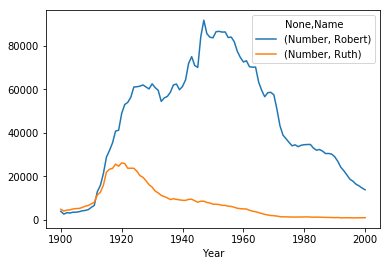

In [45]:
print_plot(get_names())